In [1]:
print("Bismillah!")

Bismillah!


In [2]:
import pandas as pd
import numpy as np
import glob

In [3]:
# Reading consumption.csv large file

#df = pd.read_csv("C:\\Users\\satha\\Downloads\\data-20200926T065152Z-001\\data\\consumption.csv")
#df.head()

In [4]:
# Splitting large files 
# one time execution

#suffix = 1
#split = 750
#for i in range(len(df)):
#    if i % split == 0:
#        df[i:i+split].to_csv(f"consumption_{suffix}.csv", sep =',', index=False, index_label=False)
#        suffix += 1

In [5]:
path = r'C:\Users\satha\Desktop\Projects\EON' # use your path
all_files = glob.glob(path + "/consumption_*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

cons = pd.concat(li, axis=0, ignore_index=True)

In [6]:
cons.count()

meter_id               3248
2017-01-01 00:00:00     268
2017-01-01 00:30:00     268
2017-01-01 01:00:00     268
2017-01-01 01:30:00     268
                       ... 
2017-12-31 21:30:00    3226
2017-12-31 22:00:00    3226
2017-12-31 22:30:00    3226
2017-12-31 23:00:00    3226
2017-12-31 23:30:00    3226
Length: 17521, dtype: int64

In [7]:
cons.head()

meter_id  2017-01-01 00:00:00  \
0  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
1  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
2  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
3  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
4  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   

   2017-01-01 00:30:00  2017-01-01 01:00:00  2017-01-01 01:30:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2017-01-01 02:00:00  2017-01-01 02:30:00  2017-01-01 03:00:00  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   2017-01-01 03:30:00  2017-01-01 04:00:00  ...  2017-12-31 19:00:00  \
0                  NaN                  NaN  ...                0.052   
1                  NaN                  NaN  ...                0.402   
2                  NaN                  NaN  ...                0.110   
3                  NaN                  NaN  ...                0.118   
4                  NaN                  NaN  ...                0.022   

   2017-12-31 19:30:00  2017-12-31 20:00:00  2017-12-31 20:30:00  \
0                0.091                0.083                0.082   
1                0.639                0.537                0.834   
2                0.123                0.012                0.034   
3                0.096                0.135                0.041   
4                0.010                0.036                0.006   

   2017-12-31 21:00:00  2017-12-31 21:30:00  2017-12-31 22:00:00  \
0                0.090                0.074                0.092   
1                0.868                0.394                0.073   
2                0.006                0.027                0.001   
3                0.018                0.057                0.018   
4                0.024                0.014                0.028   

   2017-12-31 22:30:00  2017-12-31 23:00:00  2017-12-31 23:30:00  
0                0.076                0.055                0.036  
1                0.077                0.049                0.048  
2                0.044                0.004                0.035  
3                0.038                0.040                0.014  
4                0.006                0.024                0.025  

[5 rows x 17521 columns]

In [8]:
cons_df = cons.melt(id_vars='meter_id')
cons_df.rename(columns={'variable': 'datetime', 'value':'mwh'}, inplace=True)
cons_df.head()

meter_id             datetime  mwh
0  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  2017-01-01 00:00:00  NaN
1  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da  2017-01-01 00:00:00  NaN
2  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f  2017-01-01 00:00:00  NaN
3  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407  2017-01-01 00:00:00  NaN
4  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f  2017-01-01 00:00:00  NaN

In [9]:
cons_df.describe(include='all').transpose()

count unique                                         top  \
meter_id     56904960   3248  0x87934e86a878fba2ccf696882496fbd6abba547d   
datetime     56904960  17520                         2017-03-03 23:30:00   
mwh       2.75266e+07    NaN                                         NaN   

           freq      mean       std    min   25%  50%    75%    max  
meter_id  17520       NaN       NaN    NaN   NaN  NaN    NaN    NaN  
datetime   3248       NaN       NaN    NaN   NaN  NaN    NaN    NaN  
mwh         NaN  0.190543  0.290826 -0.001  0.05  0.1  0.206  9.647

In [10]:
cons_df['datetime'] = pd.to_datetime(cons_df['datetime'])
cons_df.dtypes

meter_id            object
datetime    datetime64[ns]
mwh                float64
dtype: object

In [11]:
cons_df['date'] = cons_df['datetime'].dt.date
cons_df['month'] = cons_df['datetime'].dt.month
cons_df['year'] = cons_df['datetime'].dt.year
cons_df.head()

meter_id   datetime  mwh        date  \
0  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 2017-01-01  NaN  2017-01-01   
1  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da 2017-01-01  NaN  2017-01-01   
2  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f 2017-01-01  NaN  2017-01-01   
3  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407 2017-01-01  NaN  2017-01-01   
4  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f 2017-01-01  NaN  2017-01-01   

   month  year  
0      1  2017  
1      1  2017  
2      1  2017  
3      1  2017  
4      1  2017

In [12]:
def get_seasons(month):
    for months, seasons in [
        ([3, 4, 5], 'Spring'),
        ([6, 7, 8], 'Summer'),
        ([9, 10, 11], 'Autumn'),
        ([12, 1, 2], 'Winter')
    ]:
        if month in months:
            return seasons    

In [13]:
cons_df['season'] = cons_df['month'].apply(get_seasons)
cons_df.head()

meter_id   datetime  mwh        date  \
0  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 2017-01-01  NaN  2017-01-01   
1  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da 2017-01-01  NaN  2017-01-01   
2  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f 2017-01-01  NaN  2017-01-01   
3  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407 2017-01-01  NaN  2017-01-01   
4  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f 2017-01-01  NaN  2017-01-01   

   month  year  season  
0      1  2017  Winter  
1      1  2017  Winter  
2      1  2017  Winter  
3      1  2017  Winter  
4      1  2017  Winter

In [14]:
cons_df['monthly_mwh_count'] = cons_df.groupby(['meter_id', 'month'])['mwh'].transform(pd.Series.count)
cons_df['yearly_mwh_count'] = cons_df.groupby(['meter_id', 'year'])['mwh'].transform(pd.Series.count)
cons_df.head()

meter_id   datetime  mwh        date  \
0  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 2017-01-01  NaN  2017-01-01   
1  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da 2017-01-01  NaN  2017-01-01   
2  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f 2017-01-01  NaN  2017-01-01   
3  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407 2017-01-01  NaN  2017-01-01   
4  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f 2017-01-01  NaN  2017-01-01   

   month  year  season  monthly_mwh_count  yearly_mwh_count  
0      1  2017  Winter                0.0            1104.0  
1      1  2017  Winter                0.0            1104.0  
2      1  2017  Winter                0.0            1104.0  
3      1  2017  Winter                0.0            1104.0  
4      1  2017  Winter                0.0            1104.0

In [15]:
cons_df['daily_mwh'] = cons_df.groupby(['meter_id', 'date'])['mwh'].transform(np.sum)
cons_df['monthly_mwh'] = cons_df.groupby(['meter_id', 'month'])['mwh'].transform(np.sum)
cons_df['yearly_mwh'] = cons_df.groupby(['meter_id', 'year'])['mwh'].transform(np.sum)
cons_df.head()

meter_id   datetime  mwh        date  \
0  0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 2017-01-01  NaN  2017-01-01   
1  0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da 2017-01-01  NaN  2017-01-01   
2  0x4a1ed36825360a058cec2bdd409fc2459e1ce54f 2017-01-01  NaN  2017-01-01   
3  0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407 2017-01-01  NaN  2017-01-01   
4  0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f 2017-01-01  NaN  2017-01-01   

   month  year  season  monthly_mwh_count  yearly_mwh_count  daily_mwh  \
0      1  2017  Winter                0.0            1104.0        0.0   
1      1  2017  Winter                0.0            1104.0        0.0   
2      1  2017  Winter                0.0            1104.0        0.0   
3      1  2017  Winter                0.0            1104.0        0.0   
4      1  2017  Winter                0.0            1104.0        0.0   

   monthly_mwh  yearly_mwh  
0          0.0     101.490  
1          0.0     434.419  
2          0.0     287.095  
3          0.0     419.449  
4          0.0     749.479

In [16]:
cons_dd_df = cons_df[['meter_id', 'date', 'month', 'year', 'season', 'monthly_mwh_count', 'yearly_mwh_count', 'daily_mwh', 'monthly_mwh', 'yearly_mwh']]
cons_dd_df.drop_duplicates(inplace=True)
cons_dd_df[cons_dd_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4'].head()

<ipython-input-16-406a5cdc69d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_dd_df.drop_duplicates(inplace=True)


meter_id        date  month  year  \
3098    0xfff895258c21f1a58fc06538173d02b621021ad4  2017-01-01      1  2017   
159002  0xfff895258c21f1a58fc06538173d02b621021ad4  2017-01-02      1  2017   
314906  0xfff895258c21f1a58fc06538173d02b621021ad4  2017-01-03      1  2017   
470810  0xfff895258c21f1a58fc06538173d02b621021ad4  2017-01-04      1  2017   
626714  0xfff895258c21f1a58fc06538173d02b621021ad4  2017-01-05      1  2017   

        season  monthly_mwh_count  yearly_mwh_count  daily_mwh  monthly_mwh  \
3098    Winter             1440.0           16176.0      5.950      256.762   
159002  Winter             1440.0           16176.0     10.477      256.762   
314906  Winter             1440.0           16176.0      8.559      256.762   
470810  Winter             1440.0           16176.0      7.173      256.762   
626714  Winter             1440.0           16176.0      6.897      256.762   

        yearly_mwh  
3098      2560.921  
159002    2560.921  
314906    2560.921  
470810    2560.921  
626714    2560.921

In [17]:
cons_dd_df.describe().transpose()

count         mean          std     min        25%  \
month              1185520.0     6.526027     3.447853     1.0     4.0000   
year               1185520.0  2017.000000     0.000000  2017.0  2017.0000   
monthly_mwh_count  1185520.0   708.673997   658.407999     0.0     0.0000   
yearly_mwh_count   1185520.0  8474.929803  4724.711585   432.0  3696.0000   
daily_mwh          1185520.0     4.424206     6.901168     0.0     0.0000   
monthly_mwh        1185520.0   134.957432   182.693172     0.0     0.0000   
yearly_mwh         1185520.0  1614.835308  1443.509913     0.0   636.8125   

                        50%           75%        max  
month                 7.000     10.000000     12.000  
year               2017.000   2017.000000   2017.000  
monthly_mwh_count  1104.000   1392.000000   1488.000  
yearly_mwh_count   7872.000  12000.000000  17328.000  
daily_mwh             0.000      7.095250    142.880  
monthly_mwh          79.070    218.080000   2255.063  
yearly_mwh         1248.749   2146.792375  16435.463

In [18]:
cons_mm_df = cons_df[['meter_id', 'month', 'year', 'season', 'monthly_mwh_count', 'yearly_mwh_count', 'monthly_mwh', 'yearly_mwh']]
cons_mm_df.drop_duplicates(inplace=True)
cons_mm_df[cons_mm_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4'].head()

<ipython-input-18-b83f3765bc19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_mm_df.drop_duplicates(inplace=True)


meter_id  month  year  season  \
3098      0xfff895258c21f1a58fc06538173d02b621021ad4      1  2017  Winter   
4836122   0xfff895258c21f1a58fc06538173d02b621021ad4      2  2017  Winter   
9201434   0xfff895258c21f1a58fc06538173d02b621021ad4      3  2017  Spring   
14034458  0xfff895258c21f1a58fc06538173d02b621021ad4      4  2017  Spring   
18711578  0xfff895258c21f1a58fc06538173d02b621021ad4      5  2017  Spring   

          monthly_mwh_count  yearly_mwh_count  monthly_mwh  yearly_mwh  
3098                 1440.0           16176.0      256.762    2560.921  
4836122              1344.0           16176.0      215.099    2560.921  
9201434              1488.0           16176.0      232.268    2560.921  
14034458             1440.0           16176.0      212.296    2560.921  
18711578             1200.0           16176.0      180.257    2560.921

In [19]:
cons_mm_df.describe().transpose()

count         mean          std     min        25%  \
month              38976.0     6.500000     3.452097     1.0     3.7500   
year               38976.0  2017.000000     0.000000  2017.0  2017.0000   
monthly_mwh_count  38976.0   706.244150   658.928632     0.0     0.0000   
yearly_mwh_count   38976.0  8474.929803  4724.770204   432.0  3696.0000   
monthly_mwh        38976.0   134.569609   182.786169     0.0     0.0000   
yearly_mwh         38976.0  1614.835308  1443.527823     0.0   636.8125   

                        50%           75%        max  
month                 6.500      9.250000     12.000  
year               2017.000   2017.000000   2017.000  
monthly_mwh_count  1104.000   1392.000000   1488.000  
yearly_mwh_count   7872.000  12000.000000  17328.000  
monthly_mwh          77.421    217.653250   2255.063  
yearly_mwh         1248.749   2146.792375  16435.463

In [20]:
cons_mm_df[cons_mm_df['yearly_mwh']==0]
# 0x81fa8eddb2b09393d3719984ca5520cb50f45efd -- This meter_id has only 0.0 as readings for the month of december and hence the count>0 but sum=0

meter_id  month  year  season  \
257       0x81fa8eddb2b09393d3719984ca5520cb50f45efd      1  2017  Winter   
4833281   0x81fa8eddb2b09393d3719984ca5520cb50f45efd      2  2017  Winter   
9198593   0x81fa8eddb2b09393d3719984ca5520cb50f45efd      3  2017  Spring   
14031617  0x81fa8eddb2b09393d3719984ca5520cb50f45efd      4  2017  Spring   
18708737  0x81fa8eddb2b09393d3719984ca5520cb50f45efd      5  2017  Spring   
23541761  0x81fa8eddb2b09393d3719984ca5520cb50f45efd      6  2017  Summer   
28218881  0x81fa8eddb2b09393d3719984ca5520cb50f45efd      7  2017  Summer   
33051905  0x81fa8eddb2b09393d3719984ca5520cb50f45efd      8  2017  Summer   
37884929  0x81fa8eddb2b09393d3719984ca5520cb50f45efd      9  2017  Autumn   
42562049  0x81fa8eddb2b09393d3719984ca5520cb50f45efd     10  2017  Autumn   
47395073  0x81fa8eddb2b09393d3719984ca5520cb50f45efd     11  2017  Autumn   
52072193  0x81fa8eddb2b09393d3719984ca5520cb50f45efd     12  2017  Winter   

          monthly_mwh_count  yearly_mwh_count  monthly_mwh  yearly_mwh  
257                     0.0            1104.0          0.0         0.0  
4833281                 0.0            1104.0          0.0         0.0  
9198593                 0.0            1104.0          0.0         0.0  
14031617                0.0            1104.0          0.0         0.0  
18708737                0.0            1104.0          0.0         0.0  
23541761                0.0            1104.0          0.0         0.0  
28218881                0.0            1104.0          0.0         0.0  
33051905                0.0            1104.0          0.0         0.0  
37884929                0.0            1104.0          0.0         0.0  
42562049                0.0            1104.0          0.0         0.0  
47395073                0.0            1104.0          0.0         0.0  
52072193             1104.0            1104.0          0.0         0.0

In [21]:
cons_yy_df = cons_df[['meter_id', 'year', 'yearly_mwh_count', 'yearly_mwh']]
cons_yy_df.drop_duplicates(inplace=True)
cons_yy_df[cons_dd_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4'].head()

<ipython-input-21-a8855a0c8d96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_yy_df.drop_duplicates(inplace=True)
<ipython-input-21-a8855a0c8d96>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cons_yy_df[cons_dd_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4'].head()


meter_id  year  yearly_mwh_count  \
3098  0xfff895258c21f1a58fc06538173d02b621021ad4  2017           16176.0   

      yearly_mwh  
3098    2560.921

In [22]:
cons_yy_df.describe().transpose()

count         mean          std     min        25%  \
year              3248.0  2017.000000     0.000000  2017.0  2017.0000   
yearly_mwh_count  3248.0  8474.929803  4725.437086   432.0  3696.0000   
yearly_mwh        3248.0  1614.835308  1443.731571     0.0   636.8125   

                       50%           75%        max  
year              2017.000   2017.000000   2017.000  
yearly_mwh_count  7872.000  12000.000000  17328.000  
yearly_mwh        1248.749   2146.792375  16435.463

In [23]:
#help(pd.DataFrame.duplicated)

In [24]:
#cons_df[cons_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4'].head()

In [25]:
#cons_df[cons_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4']['mwh'].plot(kind='box')

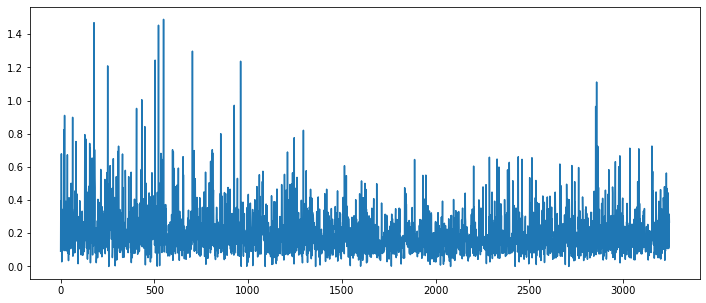

In [53]:
(cons_yy_df['yearly_mwh']/cons_yy_df['yearly_mwh_count']).plot(figsize=(12,5))

In [63]:
#cons_mm_df[cons_mm_df['meter_id'] == '0xfff895258c21f1a58fc06538173d02b621021ad4']['monthly_mwh'].plot()
cons_mm_df[['month', 'monthly_mwh']]

month  monthly_mwh
0             1        0.000
1             1        0.000
2             1        0.000
3             1        0.000
4             1        0.000
...         ...          ...
52075179     12      229.945
52075180     12      131.945
52075181     12      148.359
52075182     12      631.950
52075183     12      554.675

[38976 rows x 2 columns]